In [444]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.manifold import Isomap

import math

import matplotlib.pyplot as plt

import time

from matplotlib.animation import FuncAnimation

In [211]:
data = pd.read_excel('data/Migrate+Contact.xlsx')
dataXYZ = pd.read_excel('Data/formatted_Small_V5_segments.xlsx')
dataXYZ.columns = ['row_idx', 'ID', 'Time', 'X', 'Y', 'Z']
dataXYZ = dataXYZ[['cell ID', 'Time', 'X', 'Y', 'Z']]


data2 = pd.read_excel('data/Migrate+Contact.xlsx',sheet_name="Contacts with live cells")
data2.columns = ['Time For Cell 1','Cell ID 1','Cell ID 2','Time for Cell 2']
data2 = data2[['Cell ID 1','Cell ID 2']]

data.columns = ['cell ID','Time','Instantaneous Displacement','Instantaneous Velocity','Instantaneous Acceleration','Instantaneous Velocity Filtered','Instantaneous Acceleration Filtered','Path length','Total Displacement','Euclidean 2 TP','Euclidean 3 TP','Euclidean 4 TP','Euclidean 5 TP','Euclidean 6 TP','Euclidean 7 TP','blank','Angle 3 TP','Angle 5 TP','Angle 7 TP','Angle Filtered 3 TP','Angle Filtered 5 TP','Angle Filtered 7 TP']
data = data[['cell ID','Time','Angle 3 TP','Angle 5 TP','Angle 7 TP']]

In [402]:
times = sorted(list(set(data['Time'])))
cells2 = sorted(list(set(data2['Cell ID 2'])))
cells1 = sorted(list(set(data2['Cell ID 1'])))
cells = sorted(list(set(dataXYZ['cell ID'])))

if(cells2==cells1):
    print("yay")
    
cells = sorted(list(set(data['cell ID'])))
if(cells!=cells2):
    print("also yay")


#times = sorted(list(set(data['Time'])))
FilteredData2 = data.loc[data['cell ID'].isin(cells)]
#times = sorted(list(set(data['time'])))

FilteredData2 =  FilteredData2.loc[~np.isnan(FilteredData2).any(axis=1), :]


FilteredData1 = data.loc[data['cell ID'].isin(cells)]

FilteredData1 = FilteredData1.loc[~np.isnan(FilteredData1).any(axis=1), :]

#print(cells2)
#print(FilteredData2)
#times = sorted(list(set(data['time'])))

also yay


In [420]:
print(FilteredData1.iloc[0])

cell ID       372003.000000
Time              24.000000
Angle 3 TP        65.626440
Angle 5 TP       139.092873
Angle 7 TP        76.668195
Name: 6, dtype: float64


In [434]:
#extract only one data point/'frame' from each cell ID
# used to located nearest cell for every cell

SinglePoints = []

# makes sure only one unique cell ID is placed into isomap
uniqueSetTest = set()

# used for testing just 10
counter = 0


#for xx in FilteredData2.iterrows():
Sentinal = 0
CellIDTimePoints = []
for xx in dataXYZ.iterrows():   
   
  
    if(xx[1][0] in cells and xx[1][0] not in uniqueSetTest):
        
        CellIDTimePoints.append(xx)
        Sentinal = Sentinal + 1
    
    
    if(Sentinal == 10):
        SinglePoints.append(CellIDTimePoints)
        CellIDTimePoints = []
        uniqueSetTest.add(xx[1][0])
        Sentinal = 0
        
    
print("-----")



-----


In [435]:

print(len(SinglePoints))
print(SinglePoints[0][1][1][2:5])
print(SinglePoints[1][1][1][2:5])
print(len(SinglePoints[0]))

1167
X     75.788278
Y     31.129983
Z    110.499970
Name: 1, dtype: float64
X    609.817087
Y    130.508817
Z    466.661843
Name: 38, dtype: float64
10


In [436]:

IDMatchList = []
ColumnsList = []
for x in range(0,10,1):
    Column = []
    ColumnID = []
    for y in range(len(SinglePoints)):
        Column.append(SinglePoints[y][x][1][2:5])
        ColumnID.append(SinglePoints[y][x][1][:5])
    ColumnsList.append(Column)
    IDMatchList.append(ColumnID)





In [475]:
print(len(IDMatchList[0]))



1167


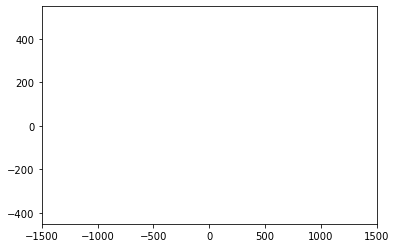

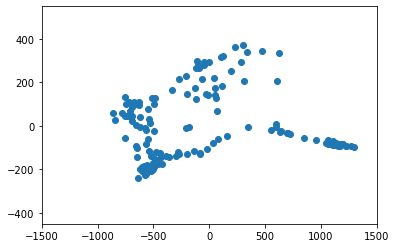

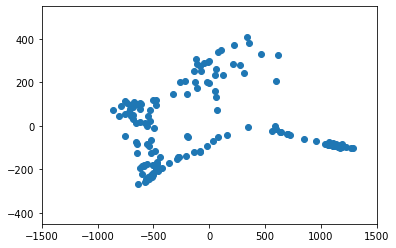

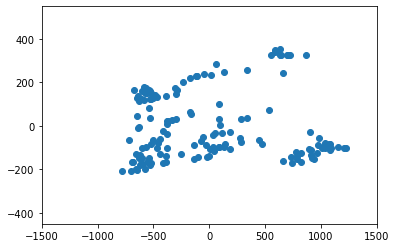

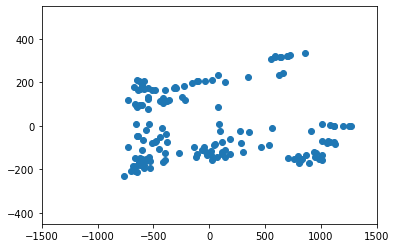

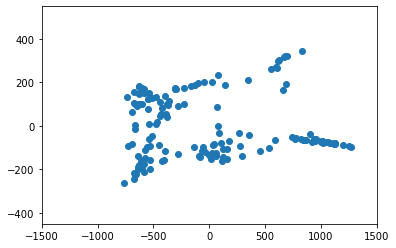

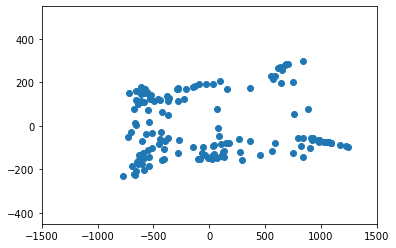

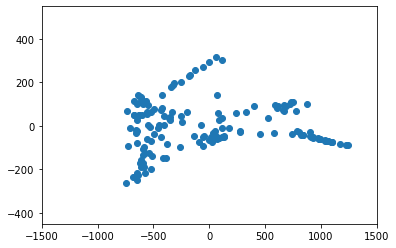

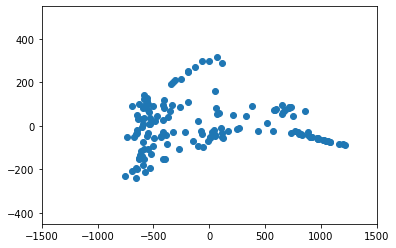

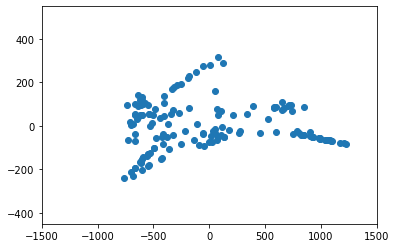

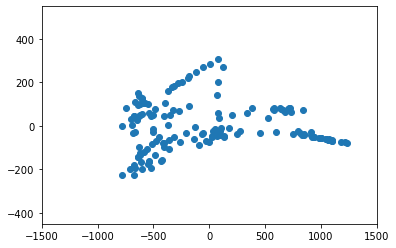

In [438]:
#fig , ax = plt.subplots(10)
plt.xlim(-1500,1500)
plt.ylim(-450,550)
plt.show()


plotStorage = []

for x in range(0,10,1):
    
    embedding = Isomap(n_components=2)
    X_transformed = embedding.fit_transform(ColumnsList[x][:150])
    X_transformed.shape
    
    
    #plt.figure()
    plt.scatter(X_transformed.T[0],X_transformed.T[1])
    
   
    plt.xlim(-1500,1500)
    plt.ylim(-450,550)
    
    plotStorage.append(X_transformed)
    plt.show()
    #plt.clf()
    #time.sleep(1)
   
  
    
    

In [460]:
data2 = pd.read_excel('data/Migrate+Contact.xlsx',header=None,sheet_name="Summary")

size = 150


CellID = data2[0][1:]
Straightness = data2[5][1:]
VelocityMean = data2[9][1:]

df = {'CellID':CellID, 'Straightness':Straightness,'VelocityMean':VelocityMean}
 
# Create DataFrame
data = pd.DataFrame(df)
data=data[:size]
data.head()

X = data["Straightness"].values

X = X.reshape(size,1)
print(X.shape)

y = data["VelocityMean"].values
y = y.reshape(size,1)
print(y.shape)
#print(data2[5])
#print(data2[9])

print(CellID)


(150, 1)
(150, 1)
1        372003
2        372005
3        372006
4        372010
5        372011
         ...   
1185    1262851
1186    1262852
1187    1262853
1188    1262867
1189    1262868
Name: 0, Length: 1189, dtype: object


In [470]:
X = []
print(len(Straightness))
print(len(VelocityMean))

for y in range(1,size+1,1):
    
    X.append([Straightness[y],VelocityMean[y]])
        
print(len(X))


1189
1189
150


In [471]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

print(len(y_km))

IDTag = list()
for x in range(1,size-1,1):
    IDTag.append([CellID[x],y_km[x]])
    



150


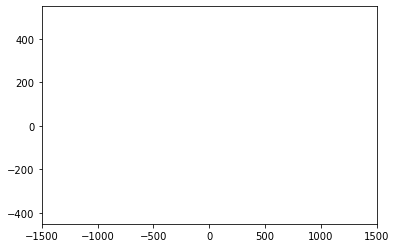

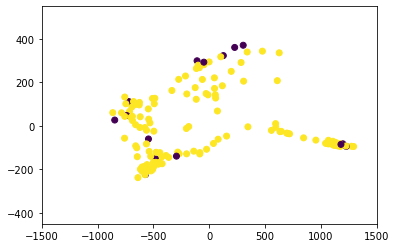

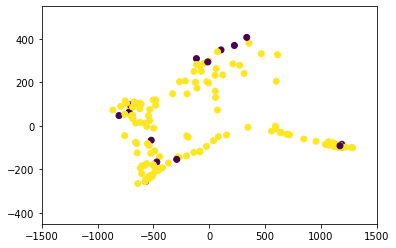

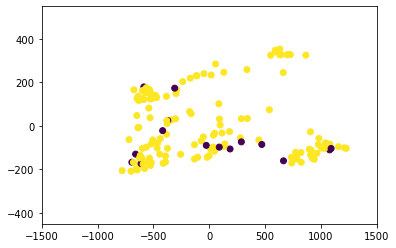

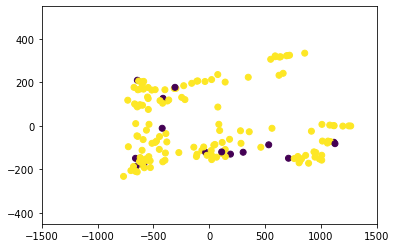

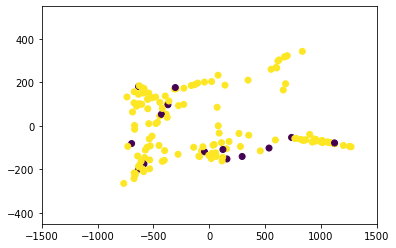

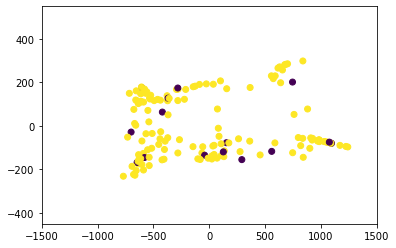

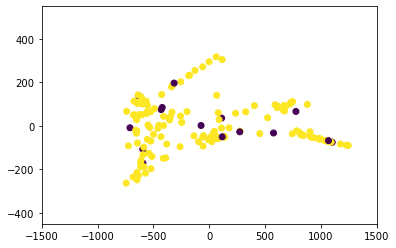

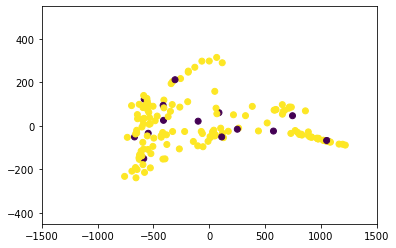

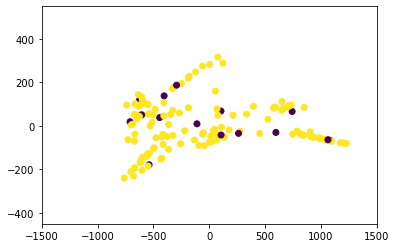

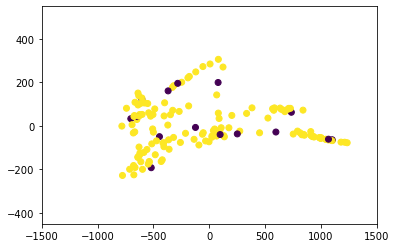

In [474]:
plt.xlim(-1500,1500)
plt.ylim(-450,550)
plt.show()

label = y_km

colors = ['red','blue']
plotStorage = []

for x in range(0,10,1):
    
    embedding = Isomap(n_components=2)
    X_transformed = embedding.fit_transform(ColumnsList[x][:150])
    X_transformed.shape
    
    
    #plt.figure()
    plt.scatter(X_transformed.T[0],X_transformed.T[1],c=label)
    
   
    plt.xlim(-1500,1500)
    plt.ylim(-450,550)
    
    plotStorage.append(X_transformed)
    plt.show()
    #plt.clf()
    #time.sleep(1)
   

In [476]:
print(len(IDMatchList[0][:150]))

150
